<a href="https://colab.research.google.com/github/vinayakpotdar2114/Corona-Virus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.



**Data Description**

The dataset consists of web scrapped data, i.e. from Twitter. The dataset consists of tweets made by users regarding Covid-19. We can see records from year 2020.

The names and usernames have been given codes to avoid any privacy concerns.

The features present in the data are --

1- Username

2- ScreenName

3- Location

4- TweetAt

5- OriginalTweet

6- Sentiment

# **The Flow of Experiment**

*   **Library Imports**
*   **Dataset Loading**
*   **EDA**
*   **Data Preprocessing**
*   **Vectorization**
*   **Fitting Models**
*   **Evaluation**
*   **Conclusion** 


In [167]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import string
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [168]:
# Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Corona Virus Tweet Sentiment - Potdar Vinayak/Dataset/Coronavirus Tweets.csv",encoding = 'latin')

In [170]:
dataset.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [171]:
dataset.tail()

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

In [172]:
dataset.describe(include= "all")

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                            OriginalTweet Sentiment  
count                                               41157     41157  
unique                                              41157         5  
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive  
freq                                                    1     11422  
mean                                                  NaN       NaN  
std                                                   NaN       NaN  
min                                                   NaN       NaN  
25%                                                   NaN       NaN  
50%                                                   NaN       NaN  
75%                                                   NaN       NaN  
max                                                   NaN       NaN

In [173]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [174]:
dataset.shape

(41157, 6)

# **Null Value Analysis:**

In [175]:
dataset.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Here about 20% of Tweet Locations are missing. This wont be affecting the classification process while doing sentiment analysis. We can let this slide for now and remove later when needed.



---

---


# **Exploratory Data Analysis**

1. **When did the Tweets Started ?**

In [176]:
# Understanding when the tweets started to appear regarding Covid-19.
dataset.TweetAt.value_counts(sort= True)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

**Findings-** The tweets regarding Covid-19 started to appear from mid of  March 2020. Here we have the data for two months i.e. March and April 2020.

2. **Origins of Tweets and Top Tweeter Locations**

In [177]:
# Number of Unique locations.
locations = list(dataset.Location.unique())
len(locations)

12221

In [178]:
loc_tweet_count = pd.DataFrame(dataset['Location'].value_counts().sort_values(ascending=False))
loc_tweet_count.reset_index(inplace=True)
loc_tweet_count.rename(columns={'index':'Location', 'Location':'Count'}, inplace=True)
top_loc=loc_tweet_count.head(15)

[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'England, United Kingdom'),
 Text(0, 0, 'Toronto, Ontario'),
 Text(0, 0, 'Global')]

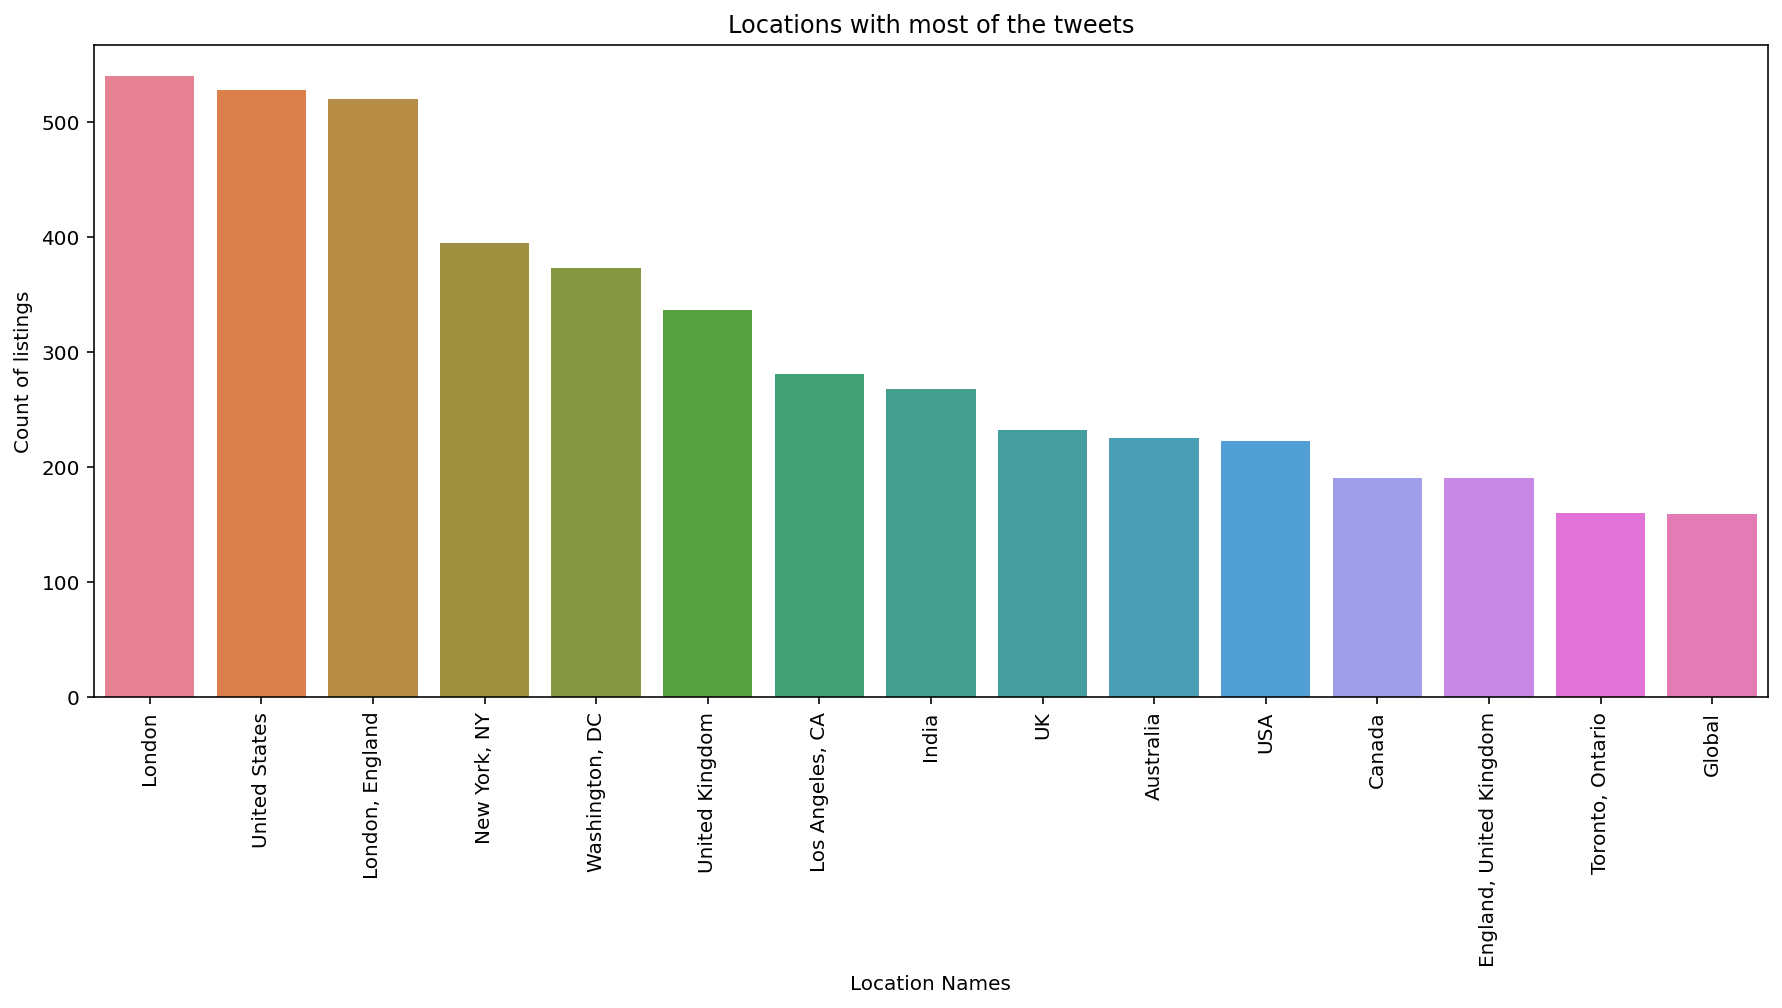

In [179]:
plt.subplots(figsize=(15,6))
top_locations=sns.barplot(x="Location", y="Count", data=top_loc,palette='husl')
top_locations.set_title('Locations with most of the tweets')
top_locations.set_ylabel('Count of listings')
top_locations.set_xlabel('Location Names')
top_locations.set_xticklabels(top_locations.get_xticklabels(), rotation=90)

**Findings** Here we can see the top tweeting locations from the dataset. London being the most tweeting locatioin from the bunch. We can see some peculiarity in the dataset i.e. "London" and "London, England" are represented as two different locations. This can be ignored as this wont be helping in the Sentiment Analysis process.

3. **Sentiment Distribution**

Here we will be checking if the dataset is fairly populated and is balanced. Checking the balance in the dataset can give us a direction to use evaluation metrics accordingly.

If the data has somewhat balanced dataset, then we can consider accuracy scores over recall and precision.

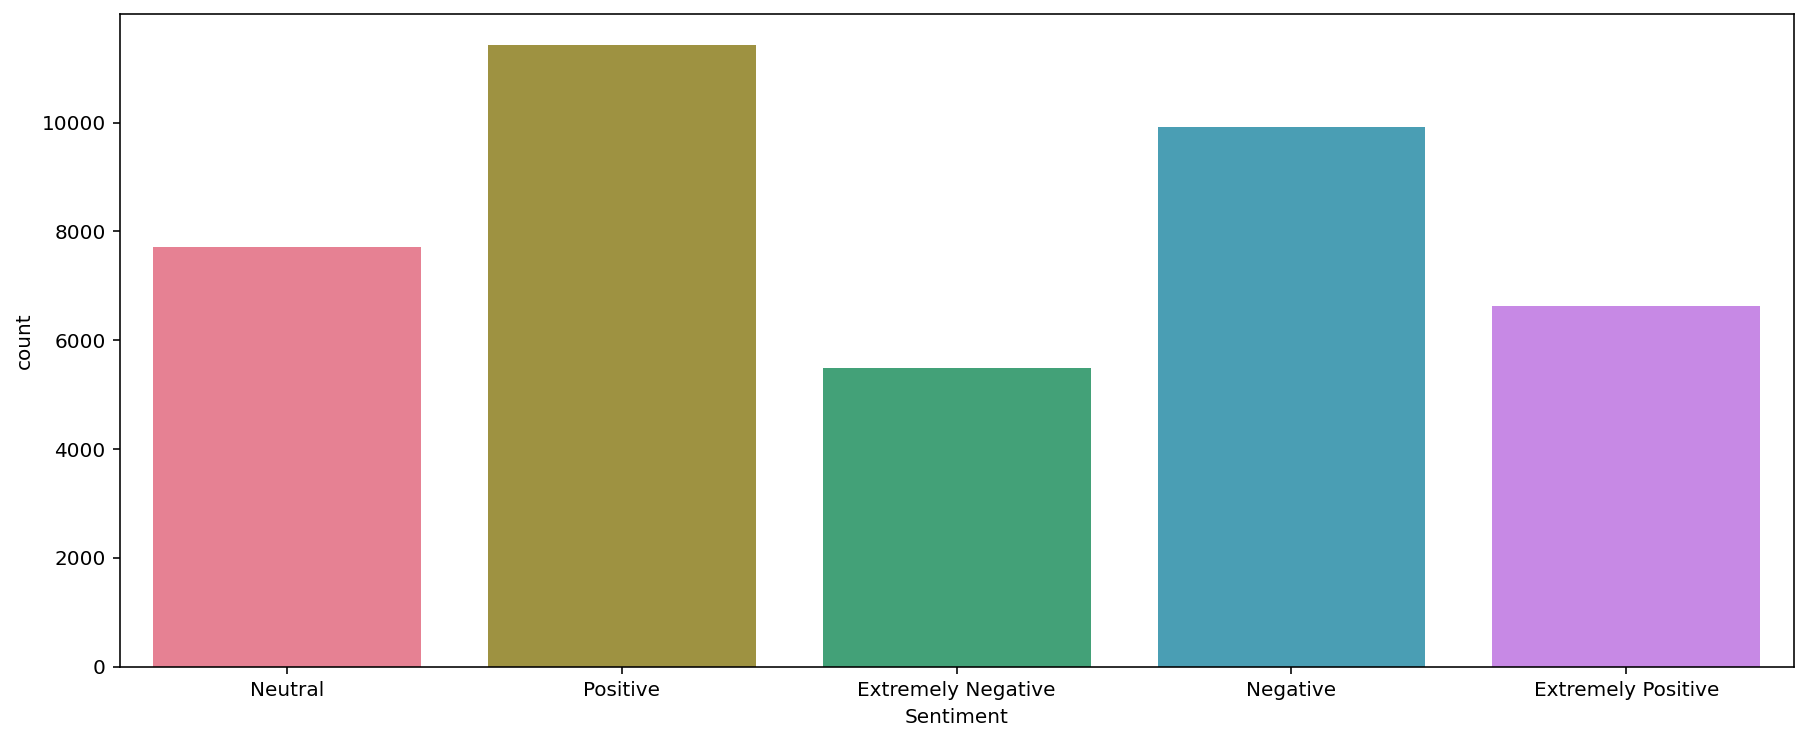

In [180]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Sentiment', data=dataset,palette="husl")

Even if we combine Neutral, Positive and Extremely Positive and pitch it against Negative and Extremely Negative, we will have somewhat balanced dataset.Since this is a multiclass classification problem, we will be considering Precision and Recall also.

4. **Getting unique hashtags used for each sentiment**

In [181]:
# Creating a function to extract all the hashtags from a document.
import re 
def hashtags_mining(x):
    hash = []
    for i in x:
        hashtags = re.findall(r'#(\w+)', i)
        hash.append(hashtags)
    return hash

In [182]:
# All Hashtags Mining
AH = hashtags_mining(dataset['OriginalTweet'])
# Unnesting the Nested List
AH = sum(AH, [])

In [183]:
# Extremely Positive Hashtags Mining
EPH = hashtags_mining(dataset['OriginalTweet'][dataset['Sentiment'] == 'Extremely Positive'])

In [184]:
# Unnesting the Nested List
EPH = sum(EPH, [])

In [185]:
EPH

['horningsea',
 'COVID2019',
 'Trials',
 'Monthly',
 'Yearly',
 'Prices',
 'Subscriptions',
 'bestiptv',
 'iptv',
 'Service',
 'Iptv',
 'iptvdeals',
 'Cheap',
 'ipTV',
 'Football',
 'HD',
 'Movies',
 'Adult',
 'Cinema',
 'hotmovies',
 'iptvnew',
 'iptv2020',
 'Adult',
 'COVID2019',
 'Trials',
 'Monthly',
 'Yearly',
 'Prices',
 'Subscriptions',
 'bestiptv',
 'iptv',
 'Service',
 'Iptv',
 'iptvdeals',
 'Cheap',
 'ipTV',
 'Football',
 'HD',
 'Movies',
 'Adult',
 'Cinema',
 'hotmovies',
 'ipTv',
 '18Movies',
 'consumer',
 'covid19',
 'tracker',
 'BreakingNews',
 'Breaking',
 'Coronavirus',
 'CoronavirusOutbreak',
 'COVID19',
 'COVID',
 'COVID_19',
 'COVID2019',
 'Collapse',
 'CoronavirusOutbreak',
 'coronavirus',
 'COVID2019',
 'jlmco',
 'jlmcobrand',
 'coronapocolypse',
 'coronavirus',
 'CoronavirusOutbreak',
 'COVID19',
 'shoponline',
 'coronavirus',
 'COVID19',
 'peoplearelosingtheirminds',
 'StopTheMadness',
 'stoppanicbuying',
 'coronavirus',
 'StopPanicBuying',
 'BeKind',
 'mufc',
 '

In [186]:
# Positive Hashtags Mining
PH = hashtags_mining(dataset['OriginalTweet'][dataset['Sentiment'] == 'Positive'])

In [187]:
# Unnesting the Nested List
PH = sum(PH, [])

In [188]:
PH

['COVID19france',
 'COVID_19',
 'COVID19',
 'coronavirus',
 'confinement',
 'Confinementotal',
 'ConfinementGeneral',
 'Covid_19',
 'CoronaVirus',
 'coronavirus',
 'covid19',
 'COVID19',
 'CoronavirusOutbreak',
 'COVID2019',
 'economy',
 'onlineshopping',
 'coronavirus',
 'covid19',
 'stayhome',
 'coronavirus',
 'COVID19',
 'coronapocolypse',
 'coronavirus',
 'coronavirus',
 'LockdownCanada',
 'coronavirus',
 'Coronavirus',
 'COVID19',
 'covid19',
 'ecommerce',
 'omnichannel',
 'retail',
 'digital',
 'coronavirus',
 'coronavirus',
 'COVID2019',
 'StayHealthy',
 'coronavirus',
 'Covid_19',
 'pricegougers',
 'Hoarders',
 'Idiots',
 'panicbuying',
 'selfishpeople',
 'CoronavirusOutbreak',
 'coronavirus',
 'COVID',
 'COVID19',
 'coronapocolypse',
 'coronavirus',
 'COVID',
 'Hoarders',
 'groceries',
 'panicshopping',
 'StopPanicBuying',
 'coronavirus',
 'COVID2019',
 'StaySafe',
 'frontlines',
 'WINWIN',
 'coronavirus',
 'stayindoorsandshop',
 'coronavirus',
 'StopPanicBuying',
 'reverselog

In [189]:
# Neutral Hashtags Mining
NH = hashtags_mining(dataset['OriginalTweet'][dataset['Sentiment'] == 'Neutral'])

In [190]:
# Unnesting the Nested List
NH = sum(NH, [])

In [191]:
NH

['Rebel',
 'toiletpapercrisis',
 'covid_19',
 'manila',
 'lockdown',
 'covid2019',
 'Philippines',
 'coronavirus',
 'BrickAndMortar',
 'COVID2019',
 'QuarantineLife',
 'CoronavirusOutbreak',
 'coronavirus',
 'IMadeThisUp',
 'FakeNews',
 'covid_19',
 'pandemic',
 'socialdistancing',
 'retail',
 'seafood',
 'coronavirus',
 'CoronavirusOutbreak',
 'CoronavirusReachesDelhi',
 'Coronavid19',
 'CoronaVirusUpdates',
 'COVID2019',
 'COVID19',
 'JhalakBollywood',
 'JhalakKollywood',
 'JhalakTollywood',
 'coronavirus',
 'TrumpIsAnIdiot',
 'trumpneedstoshutup',
 'coronavirus',
 'Priorities',
 'CoronaVirus',
 'COVID2019',
 'retail',
 'retailapocalypse2020',
 'coronavirus',
 'retailnews',
 'COVID19',
 'Coronavirus',
 'LOTL',
 'boomers',
 'COVID2019',
 'SocialDista',
 'Dallas',
 'coronapocolypse',
 'COVID2019',
 'CoronaVirusUpdates',
 'CoronaVirus',
 'immunesystem',
 'immunesupport',
 'coronavirus',
 'covid_19',
 'Food',
 'coronavirus',
 'foodshortage',
 'foodsecurity',
 'Stockpile',
 'Canada',
 'Me

In [192]:
# Negative Hashtags Mining
NGH = hashtags_mining(dataset['OriginalTweet'][dataset['Sentiment'] == 'Negative'])

In [193]:
# Unnesting the Nested List
NGH = sum(NGH, [])

In [194]:
NGH

['govindia',
 'IndiaFightsCorona',
 'COVID19',
 'CovidNYC',
 'CoronaVirusSA',
 'Covid_19',
 'coronavirus',
 'Scammers',
 'COVID',
 'coronavirus',
 'cdc',
 'flu',
 'trends',
 'alert',
 'nameandshame',
 'covid',
 'coronavirus',
 'Liverpool',
 'services',
 'food',
 'delivery',
 'coronavirus',
 'COVID',
 'COVID19Aus',
 'coronavirus',
 'DontPanicBuy',
 'coronavirus',
 'coronapocolypse',
 'Covid_19',
 'panicbuying',
 'coronavirus',
 'panicbuying',
 'whatashitshow',
 'stoppanickbuying',
 'thinkingofothers',
 'coronavirus',
 'COVID19',
 'Covid_19',
 'panicshopping',
 'pricegougers',
 'Idiots',
 'unpopularopinion',
 'COVID2019',
 'Malaysia2020',
 'coronavirus',
 'pricegouging',
 'coronavirus',
 'KenyanTraffic',
 'coronavirus',
 'scrubs',
 'covid19',
 'Medtwitter',
 'coronavirus',
 'Kashmir',
 'CoronavirusOutbreak',
 'KashmirLockdown',
 'Kashmiris',
 'COVID2019',
 'coronapocolypse',
 'coronavirus',
 'covid19',
 'nationalquarantine',
 'coronavirus',
 'covid19',
 'coronavirus',
 'COVID',
 'coronav

In [195]:
# Extremely Negative Hashtags Mining
ENGH = hashtags_mining(dataset['OriginalTweet'][dataset['Sentiment'] == 'Extremely Negative'])

In [196]:
# Unnesting the Nested List
ENGH = sum(ENGH, [])

In [197]:
ENGH

['COVID19',
 'coronavirus',
 'CoronavirusFrance',
 'restezchezvous',
 'StayAtHome',
 'confinement',
 'Coronavirus',
 'StockUp',
 'CoronavirusOutbreak',
 'coronavirus',
 'houston',
 'nofood',
 'Notoiletpaper',
 'NoHandShakes',
 'nohandsanitizer',
 'COVID19',
 'pandemic',
 'totallockdown',
 'COVID2019usa',
 'walmart',
 'coronavirus',
 'CoronavirusOutbreak',
 'COVID',
 'coronavirus',
 'coronavirusuk',
 'anxiety',
 'panicbuyinguk',
 'morons',
 'COVID2019',
 'coronavirus',
 'retail',
 'Covid19Walkout',
 'Coronavirus',
 'Thread',
 'coronavirus',
 'covid',
 'Coronavirus',
 'coronavirus',
 'Coronavirusupdate',
 'Coronapocolypse',
 'cct320',
 'toiletpaper',
 'coronavirus',
 'coronavirus',
 'coronapocolypse',
 'French',
 'coronavirus',
 'coronavirus',
 'coronavirus',
 'StayInformed',
 'StayConnected',
 'NAILBA2020',
 'COVID2019',
 'bread',
 'coronavirus',
 'covid',
 'stockup',
 'davesbread',
 'coronavirus',
 'coronavirus',
 'Yorkshire',
 'UK',
 'Iran',
 'coronavirus',
 'Italy',
 'COVID2019',
 'I

Now that we have all the Hashtags according to their respective sentiments, let us find out which are the unique hashtags to each Sentiment.

In [198]:
unique_EPH = list(set(EPH) - set(PH) - set(NH) - set(NGH) - set(ENGH))

In [199]:
unique_PH=list(set(PH) - set(EPH) - set(NH) - set(NGH) - set(ENGH))

In [200]:
unique_NH=list(set(NH) - set(EPH) - set(PH) - set(NGH) - set(ENGH))

In [201]:
unique_NGH=list(set(NGH) - set(EPH) - set(NH) - set(PH) - set(ENGH))

In [202]:
unique_ENGH=list(set(ENGH) - set(EPH) - set(NH) - set(NGH) - set(PH))



---



---



---



5. **Getting Word Clouds for unique hashtags for each 'Sentiment'.**

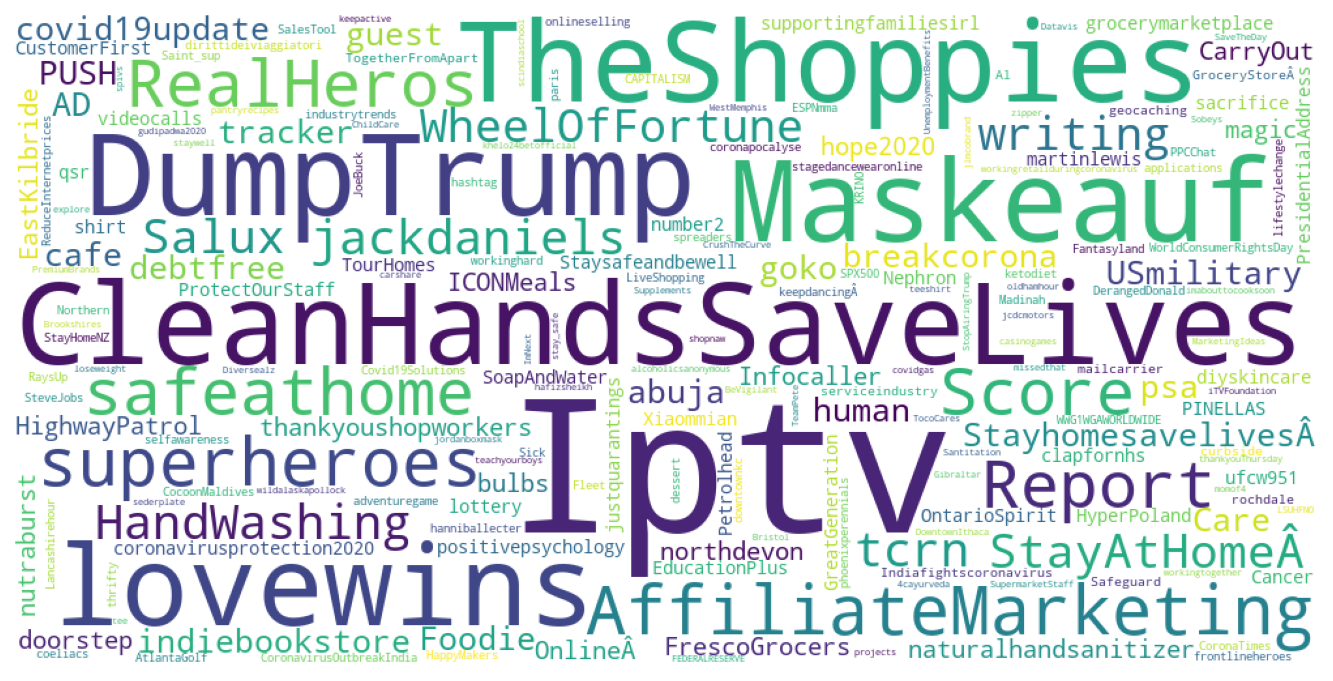

In [203]:
# Getting Wordcloud for Extremely Positive Hashtags.
unique_string=(" ").join(unique_EPH)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

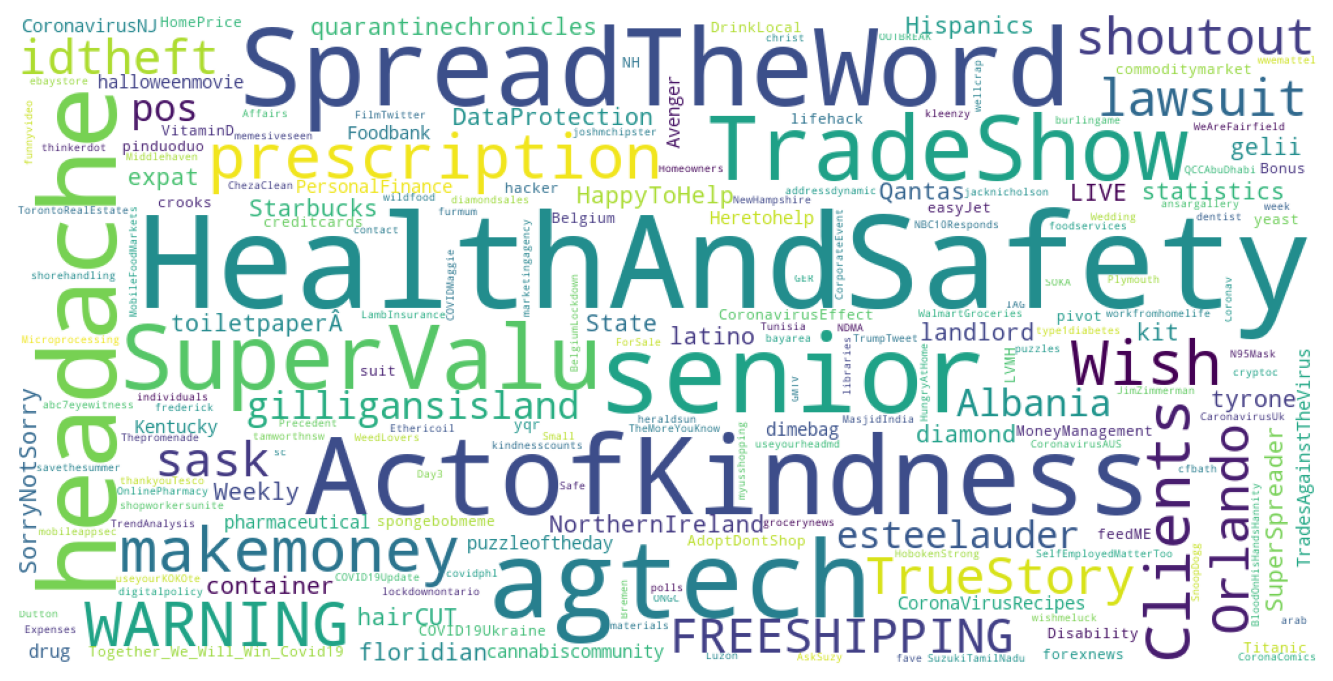

In [204]:
# Getting Wordcloud for Positive Hashtags.
unique_string=(" ").join(unique_PH)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

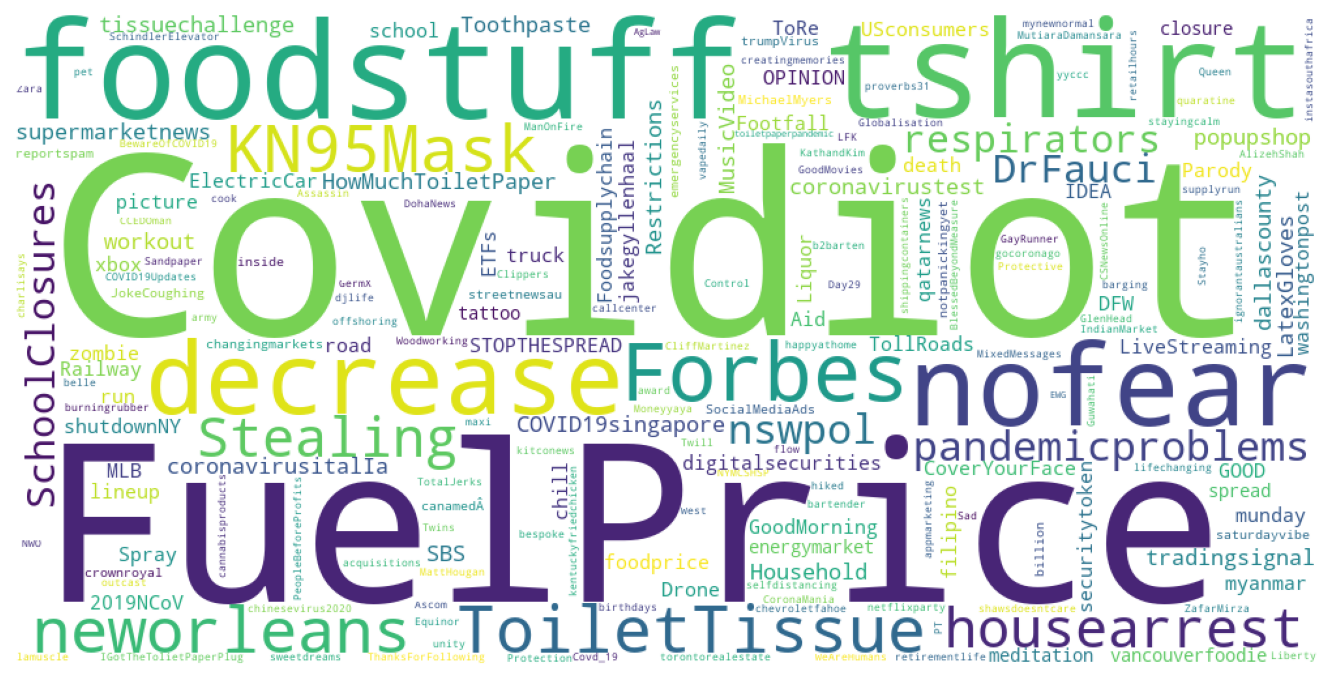

In [205]:
# Getting Wordcloud for Neutral Hashtags.
unique_string=(" ").join(unique_NH)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

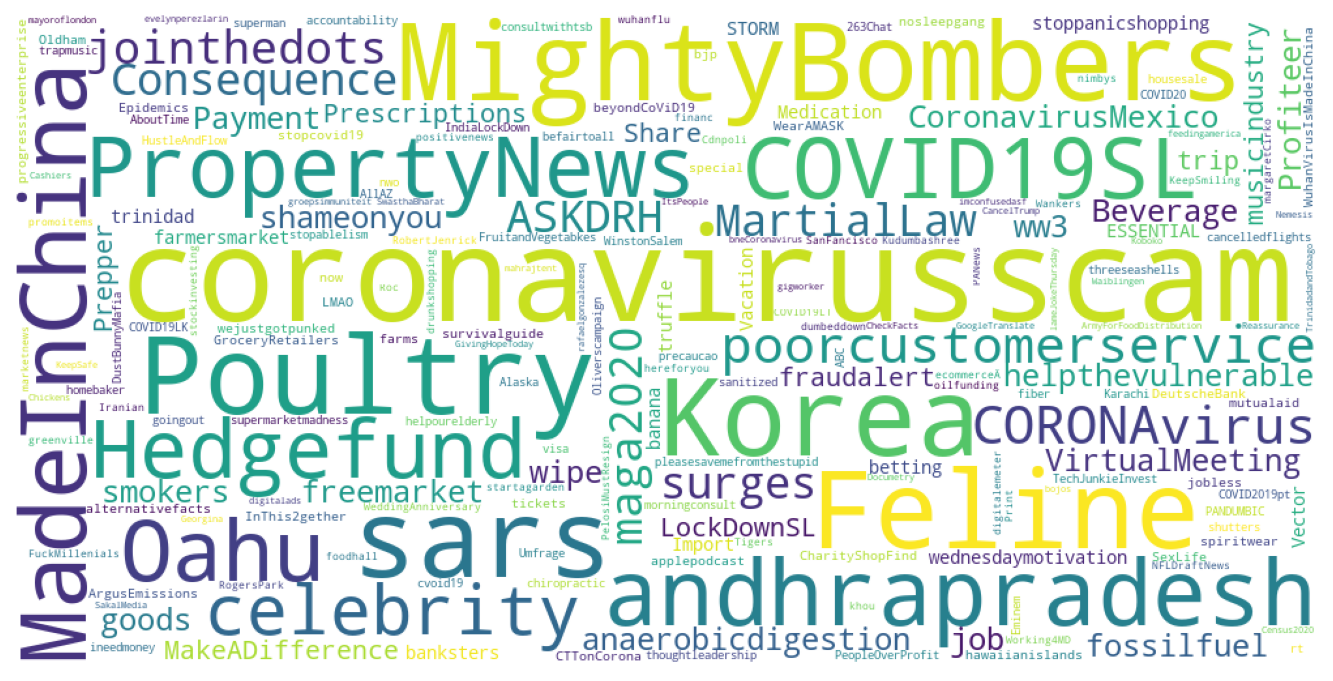

In [206]:
# Getting Wordcloud for Negative Hashtags.
unique_string=(" ").join(unique_NGH)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

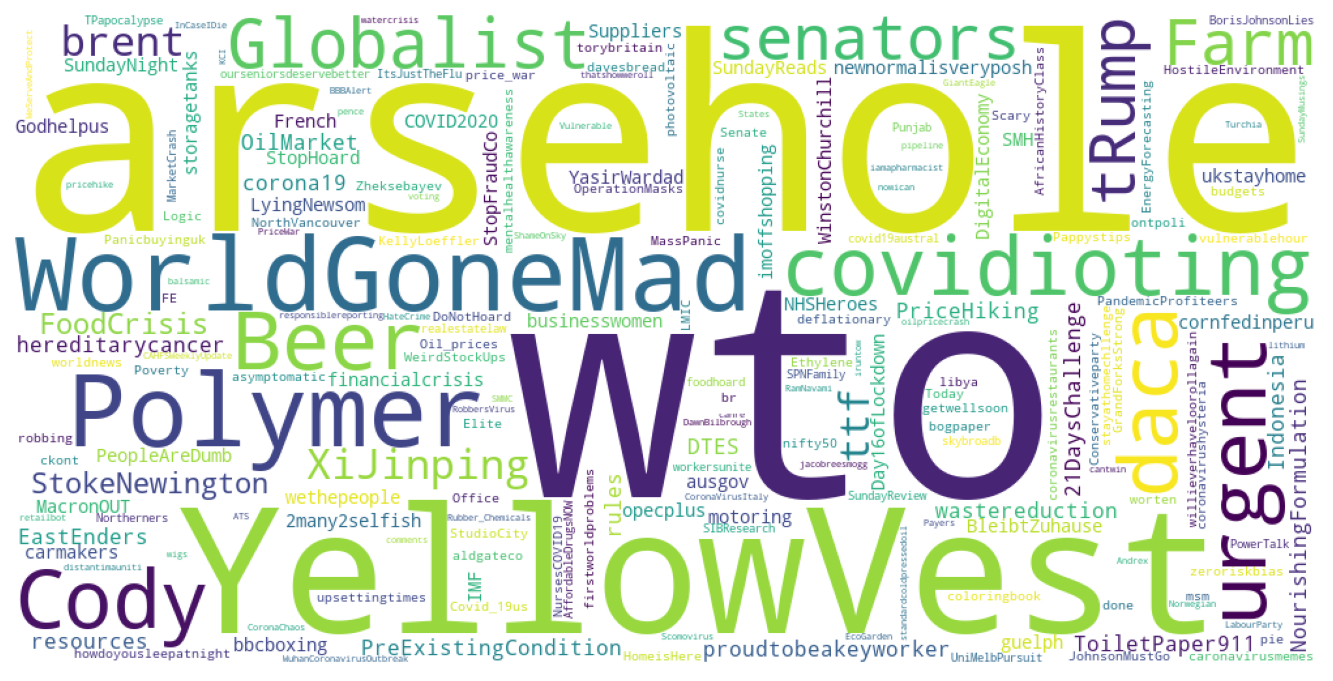

In [207]:
# Getting Wordcloud for Extremely Negative Hashtags.
unique_string=(" ").join(unique_ENGH)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Findings of EDA**

* As per the dataset, the tweets regarding Coronavirus started surfacing from mid of March 2020.

* US, UK, India, Australia, Canada are the top tweeting countries from the bunch of data, where London, New York, Washington DC happen to be the most actively tweeting cities.

* In order to understand and decide which evaluation metric to use, we performed Sentiment distribution analysis. We have a fairly balanced data, so we can give some importance to accuracy score.

* We also extracted the unique hashtags for each sentiment and presented in a wordcloud.

* We have a lot of discrepencies in the Location feature, but it can be ignored as it wont be helping in the Sentiment Analysis process.

# **Data Preprocessing**


*   Removing Urls  
*   Removing Tagged Usernames
*   Removing Punctuations and Special Characters
*   Removing Stop Words
*   Stemming



In [208]:
# Removing the urls from the Original Tweets (ot).
def remove_urls (ot):
    ot = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', ot, flags=re.MULTILINE)
    return(ot)

In [209]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_urls)

In [210]:
dataset.head(10)

UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0         @MeNyrbie @Phil_Gahan @Chrisitv  and  and              Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
5  As news of the regionÂs first confirmed COVID...            Positive  
6  Cashier at grocery store was sharing his insig...            Positive  
7  Was at the supermarket today. Didn't buy toile...             Neutral  
8  Due to COVID-19 our retail store and classroom...            Positive  
9  For corona prevention,we should stop to buy th...            Negative

In [211]:
# Removing Tagged Usernames
def remove_user(ot):
  ot= re.sub('@[\w]+','',ot)
  return ot

In [212]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_user)

In [213]:
dataset.head(5)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0                                          and  and              Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [214]:
# Removing Punctuations and Special Characters
def remove_punctuation(ot):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return ot.translate(translator)

In [215]:
#pct=string.punctuation
#pct
#These are the punctuations and special characters being removed      !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

In [216]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_punctuation)
dataset.head(5)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0                                          and  and              Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia Woolworths to give elder...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me ready to go at supermarket during the COVID...  Extremely Negative

In [217]:
# Removing Stop Words
nltk.download('stopwords')
sw=stopwords.words('english')

# Downloading the stop words from nltk library and storing them

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [221]:
# Creating a function to remove stop words from the Tweets.
def stopword(ot):
    # Lowercasing the words and removing stop words.
    ot = [word.lower() for word in ot.split() if word.lower() not in sw]
    return " ".join(ot)

In [223]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(stopword)
dataset.head(5)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0                                                                Neutral  
1  advice talk neighbours family exchange phone n...            Positive  
2  coronavirus australia woolworths give elderly ...            Positive  
3  food stock one empty please dont panic enough ...            Positive  
4  ready go supermarket covid19 outbreak im paran...  Extremely Negative

In [224]:
# Stemming Operation

stemmer = SnowballStemmer("english")

def stemming(ot):    
    '''a function which stems each word in the given text'''
    ot = [stemmer.stem(word) for word in ot.split()]
    return " ".join(ot) 

In [226]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(stemming)
dataset.head(10)

UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0                                                                Neutral  
1  advic talk neighbour famili exchang phone numb...            Positive  
2  coronavirus australia woolworth give elder dis...            Positive  
3  food stock one empti pleas dont panic enough f...            Positive  
4  readi go supermarket covid19 outbreak im paran...  Extremely Negative  
5  news regionâ first confirm covid19 case came ...            Positive  
6  cashier groceri store share insight covid19 pr...            Positive  
7  supermarket today didnt buy toilet paper rebel...             Neutral  
8  due covid19 retail store classroom atlanta ope...            Positive  
9  corona preventionw stop buy thing cash use onl...            Negative